## **Deskripsi DataSet**
### Dataset 1: `u.data`

#### Sumber Data
Dataset ini merupakan bagian dari MovieLens 100k dataset dan tersedia di [MovieLens 100k Dataset](https://grouplens.org/datasets/movielens/100k/).

#### Jumlah Baris dan Kolom
- Jumlah baris: 100.000
- Jumlah kolom: 4

#### Kondisi Data
- Tidak terdapat missing value
- Perlu dilakukan pengecekan duplikasi berdasarkan kombinasi `user_id`, `item_id`, dan `timestamp`
- Tidak ada outlier karena rating dibatasi pada skala 1–5

#### Penjelasan Kolom:
| Kolom       | Deskripsi                                         |
|-------------|---------------------------------------------------|
| user_id     | ID unik pengguna (1–943)                          |
| item_id     | ID unik film (1–1682)                             |
| rating      | Rating film dari pengguna (skala 1–5)             |
| timestamp   | Waktu pemberian rating dalam format UNIX time     |

---

### Dataset 2: `u.item`

#### Sumber Data
Merupakan bagian dari folder `ml-100k/` dalam MovieLens 100k dataset.

#### Jumlah Baris dan Kolom
- Jumlah baris: 1.682
- Jumlah kolom: 24

#### Kondisi Data
- Tidak terdapat missing value
- Tidak terdapat data duplikat (setiap `movie_id` unik)
- Kolom genre dalam bentuk biner (0 atau 1), tidak terdapat outlier

#### Penjelasan Kolom:
| No  | Kolom                | Deskripsi                                                  |
|-----|----------------------|------------------------------------------------------------|
| 1   | movie_id             | ID unik film                                               |
| 2   | movie_title          | Judul film                                                 |
| 3   | release_date         | Tanggal rilis film                                         |
| 4   | video_release_date   | Tanggal rilis versi video                                  |
| 5   | IMDb_URL             | Link ke halaman film di IMDb                               |
| 6–24| 19 kolom genre biner | Menandakan genre film (1 = ya, 0 = tidak)                  |

#### Daftar Genre (Kolom ke-6 hingga ke-24):
| Kolom     | Genre         |
|-----------|---------------|
| 6         | unknown       |
| 7         | Action        |
| 8         | Adventure     |
| 9         | Animation     |
| 10        | Children's    |
| 11        | Comedy        |
| 12        | Crime         |
| 13        | Documentary   |
| 14        | Drama         |
| 15        | Fantasy       |
| 16        | Film-Noir     |
| 17        | Horror        |
| 18        | Musical       |
| 19        | Mystery       |
| 20        | Romance       |
| 21        | Sci-Fi        |
| 22        | Thriller      |
| 23        | War           |
| 24        | Western       |

# **Load Data**

In [1]:
# datasets
! wget https://files.grouplens.org/datasets/movielens/ml-100k.zip

--2025-05-16 12:25:21--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  2.13MB/s    in 2.2s    

2025-05-16 12:25:24 (2.13 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [2]:
# unzip
! unzip ml-100k.zip -d /content/data/

Archive:  ml-100k.zip
   creating: /content/data/ml-100k/
  inflating: /content/data/ml-100k/allbut.pl  
  inflating: /content/data/ml-100k/mku.sh  
  inflating: /content/data/ml-100k/README  
  inflating: /content/data/ml-100k/u.data  
  inflating: /content/data/ml-100k/u.genre  
  inflating: /content/data/ml-100k/u.info  
  inflating: /content/data/ml-100k/u.item  
  inflating: /content/data/ml-100k/u.occupation  
  inflating: /content/data/ml-100k/u.user  
  inflating: /content/data/ml-100k/u1.base  
  inflating: /content/data/ml-100k/u1.test  
  inflating: /content/data/ml-100k/u2.base  
  inflating: /content/data/ml-100k/u2.test  
  inflating: /content/data/ml-100k/u3.base  
  inflating: /content/data/ml-100k/u3.test  
  inflating: /content/data/ml-100k/u4.base  
  inflating: /content/data/ml-100k/u4.test  
  inflating: /content/data/ml-100k/u5.base  
  inflating: /content/data/ml-100k/u5.test  
  inflating: /content/data/ml-100k/ua.base  
  inflating: /content/data/ml-100k/ua.tes

Melakukan ekstraksi file dari format ZIP untuk mengakses dan menggunakan data di dalamnya.

In [3]:
# change directory
%cd data/ml-100k/

/content/data/ml-100k


In [4]:
# list directory contents
! ls

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [5]:
# readme file
txt_files = '/content/data/ml-100k/README'
txt_content = open(txt_files, 'r').read()
print(txt_content)

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

# **Import Library**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
import warnings
warnings.filterwarnings("ignore")

# **EDA**

In [8]:
# define dataset variable
users = pd.read_csv('/content/data/ml-100k/u.data', delimiter='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])  # data film (ratings)
# Kolom-kolom yang ada di u.item
column_names = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
                'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
                'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Membaca data u.item dengan encoding yang berbeda untuk menangani karakter non-UTF-8
genres = pd.read_csv('/content/data/ml-100k/u.item', delimiter='|', header=None, names=column_names, encoding='ISO-8859-1')

# Mengecek dan menghitung jumlah nilai unik di masing-masing data frame
print('Jumlah data penonton: ', len(users['user_id'].unique()))
print('Jumlah data genre: ', len(genres['movie_id'].unique()))

Jumlah data penonton:  943
Jumlah data genre:  1682


#### **Initial Dataset Initialization**

Pada tahap awal, dilakukan inisialisasi dua variabel utama:

- **`users`**  
  Menyimpan dataset dari file `u.data`, yang berisi informasi interaksi pengguna berupa rating terhadap film.

- **`genres`**  
  Menyimpan dataset dari file `u.item`, yang memuat informasi konten film, khususnya genre dalam bentuk matriks.



In [9]:
users.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
genres.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


#### **Data Type Check on `users`**

Seluruh tipe data pada dataset `users` telah sesuai dengan kebutuhan proyek, sehingga **tidak diperlukan proses konversi tipe data** pada tahap preprocessing.

#### 📊 Informasi Tambahan
- Jumlah total entri pada dataset `users`: **99.999 baris data**.


In [12]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

#### **Dataset Structure `genres`**

Dataset `genres` terdiri dari **22 kolom** dan **1.681 baris data**. Kolom-kolom dari indeks **5 hingga 23** merupakan matriks genre, yang merepresentasikan kategori film dalam bentuk biner:

- Nilai **1** menunjukkan bahwa film termasuk dalam genre tersebut.
- Nilai **0** menunjukkan sebaliknya.

Semua kolom genre memiliki tipe data **integer** dan telah sesuai dengan kebutuhan model content-based filtering.


In [13]:
# Cek jumlah duplikat berdasarkan movie_id
print("Data duplikat pada movie_id pada users: ",users.duplicated().sum())
print("Data duplikat pada user_id pada users: ",genres.duplicated().sum())

Data duplikat pada movie_id pada users:  0
Data duplikat pada user_id pada users:  0


Hasil pemeriksaan menunjukkan bahwa **tidak terdapat data duplikat** pada kedua dataset, baik pada `users` maupun `genres`.

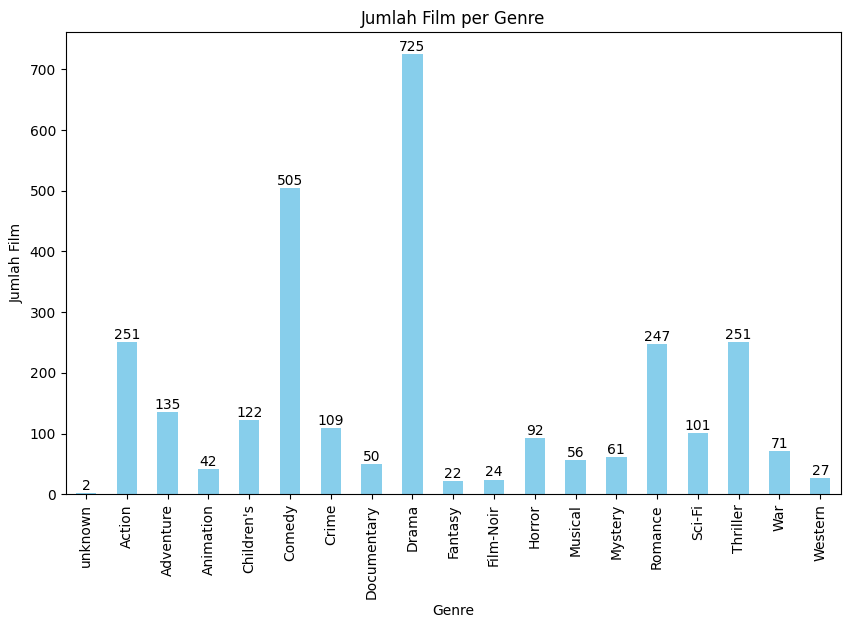

In [14]:
genre_columns = genres.columns[5:]  # Kolom genre dimulai dari indeks 5
genres_genre_data = genres[genre_columns]

# Hitung jumlah 1 untuk setiap genre
genre_counts = genres_genre_data.sum()

# Buat bar chart untuk visualisasi
plt.figure(figsize=(10, 6))
ax = genre_counts.plot(kind='bar', color='skyblue')

# Menambahkan label jumlah di atas setiap bar
for i, count in enumerate(genre_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=90)
plt.show()

Visualisasi berikut diambil dari dataset `genres` dan menggambarkan distribusi jumlah penonton berdasarkan genre film. Grafik ini menunjukkan tingkat ketertarikan pengguna terhadap masing-masing genre.

Adapun lima genre dengan jumlah penonton tertinggi adalah sebagai berikut:
1. **Drama**
2. **Comedy**
3. **Action**
4. **Thriller**
5. **Romance**

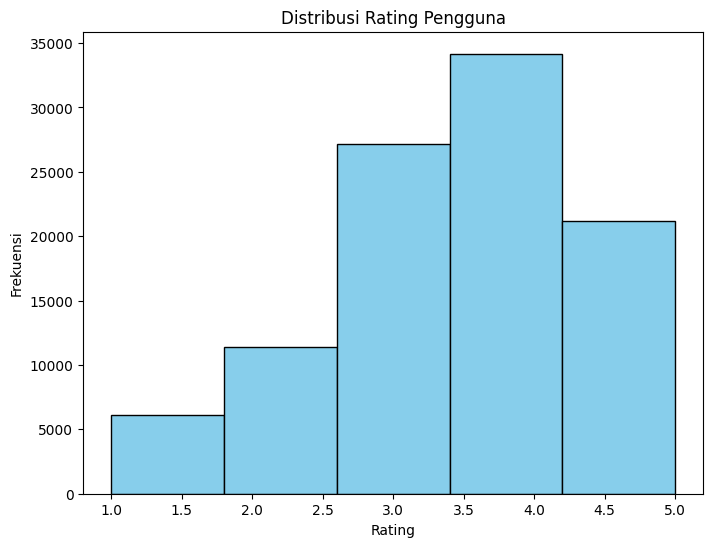

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(users['rating'], bins=5, edgecolor='black', color='skyblue')
plt.title('Distribusi Rating Pengguna')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

Rata-rata rating yang diberikan oleh pengguna berada dalam kisaran antara **2,6 hingga 4,3**.

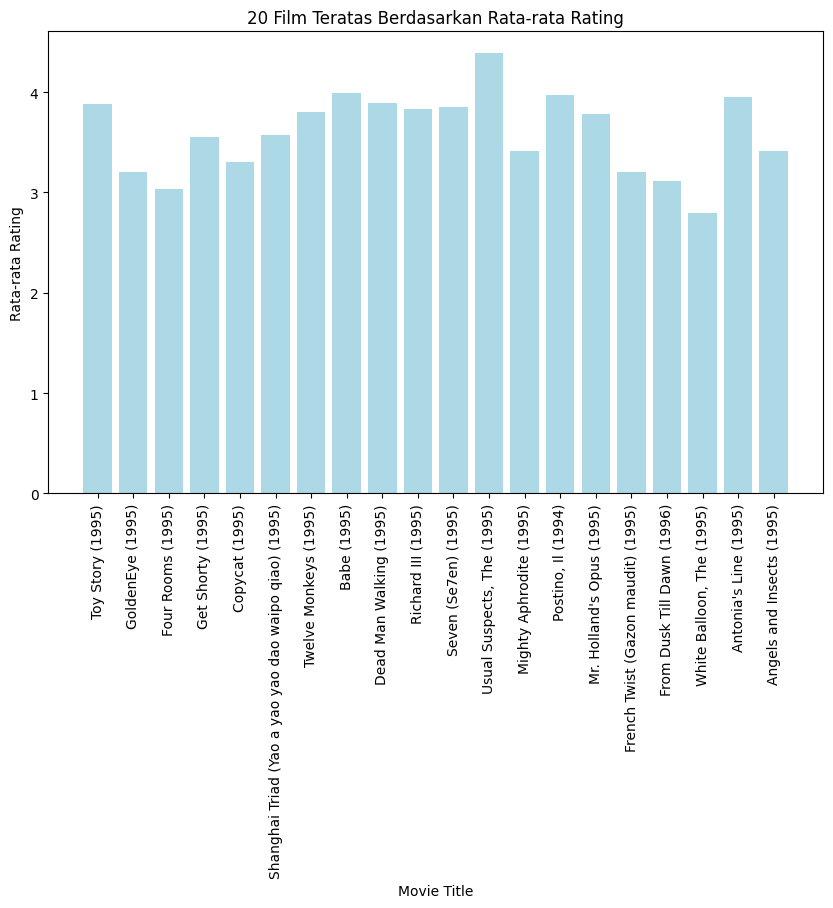

In [16]:
movie_avg_rating = users.groupby('movie_id')['rating'].mean()
top_avg_rated_movies = movie_avg_rating.head(20)  # 20 film dengan rating tertinggi

top_avg_rated_movies = pd.merge(top_avg_rated_movies, genres[['movie_id', 'movie_title']], left_index=True, right_on='movie_id')

plt.figure(figsize=(10, 6))
plt.bar(top_avg_rated_movies['movie_title'], top_avg_rated_movies['rating'], color='lightblue')
plt.title('20 Film Teratas Berdasarkan Rata-rata Rating')
plt.xlabel('Movie Title')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=90)
plt.show()

Dari total **1.681 data film** pada dataset `genres`, visualisasi ini menunjukkan **20 film dengan rating tertinggi** berdasarkan rating yang diberikan oleh pengguna. Data ini diambil dari hasil penggabungan dataset `users` dan `genres`, dengan **movie_id** sebagai primary key (PK) yang menghubungkan keduanya.

Top 5 tahun dengan jumlah film terbanyak:
release_date
01-Jan-1995    215
01-Jan-1994    213
01-Jan-1993    126
01-Jan-1997     98
01-Jan-1992     37
Name: count, dtype: int64


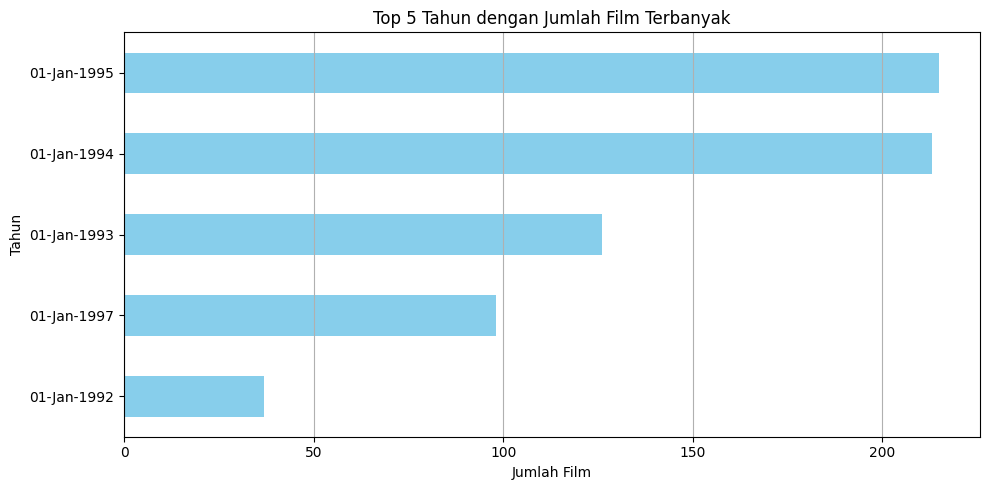

In [17]:
# Hitung jumlah film per tahun
top5_years = genres['release_date'].value_counts().nlargest(5)

# Tampilkan
print("Top 5 tahun dengan jumlah film terbanyak:")
print(top5_years)

# Visualisasi
plt.figure(figsize=(10, 5))
top5_years.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Tahun dengan Jumlah Film Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Tahun')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Tahun **1995** adalah tahun dengan produksi film terbanyak, yaitu sebanyak **215 film** 🎬. Diikuti oleh tahun **1994** dan **1993**, sementara tahun **1997** menempati posisi keempat dengan jumlah produksi film tertinggi 📅. Pola ini kembali terulang di tahun **1992**, yang menempati posisi kelima dalam daftar produksi film terbanyak 🔝.


#### **Cleaning Column Year**

In [18]:
#remove year
genres['release_date'] = genres.movie_title.str.extract('([0-9]{4})')
genres['movie_title'] = genres['movie_title'].apply(lambda x: x.split('(', 1)[0].strip() if '(' in x else x)

genres.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Pemisahan tahun dari kolom `movie_title` dilakukan dengan tujuan untuk menggantikan nilai pada kolom `release_date` dengan tahun yang diambil langsung dari judul film. Hal ini bertujuan untuk membuat tampilan data menjadi lebih rapi dan ringkas.

# **Data Preparation**

In [19]:
print("Data genre yang bernilai null: ",genres.isnull().sum())
print("\nData users yang bernilai null: ",users.isnull().sum())

Data genre yang bernilai null:  movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

Data users yang bernilai null:  user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


Dataset `users` tidak memiliki nilai yang hilang, sehingga seluruh data pada kolom tersebut lengkap.  
Namun, pada dataset `genres`, terdapat **3 kolom** yang mengandung nilai **null**.  
Untuk kolom `video_release_date`, sepertinya semua data memiliki nilai **NaN**. Selain itu, terdapat **1 data null** pada kolom `release_date` dan **3 data null** pada kolom `IMDb_url`.

## **Handling Missing Values**

In [20]:
genres.drop('video_release_date', axis=1, inplace=True)
genres['release_date'].fillna("Unknown", inplace=True)
genres['IMDb_URL'].fillna("Unknown", inplace=True)

Data **null** pada kolom `release_date` dan `IMDb_url` diisi dengan nilai **"unknown"**, sementara kolom `video_release_date` dihapus, karena ketiga kolom tersebut tidak mempengaruhi proses rekomendasi yang akan dibangun.

## **Encoding Data**

In [21]:
# Encode user_id
user_encoder = LabelEncoder()
users['user_index'] = user_encoder.fit_transform(users['user_id'])

# Encode movie_id
movie_encoder = LabelEncoder()
users['movie_index'] = movie_encoder.fit_transform(users['movie_id'])


Proses **LabelEncoder** dilakukan untuk mengonversi indeks pada dataset `users` dan `genres` agar tidak terlalu besar, sehingga dapat mencegah terjadinya **sparse matrix** saat diproses dengan model **SVD**. Sparse matrix yang besar dapat mempengaruhi performa model **collaborative filtering** secara negatif.  
Untuk itu, dibuatlah dua kolom baru, yaitu **`user_index`** dan **`movie_index`**, yang berfungsi sebagai representasi indeks yang lebih efisien.

## **Mapping**

In [22]:
user_id_map = dict(zip(users['user_index'], users['user_id']))
movie_id_map = dict(zip(users['movie_index'], users['movie_id']))

### Purpose Mapping
Mapping dilakukan untuk memastikan bahwa **LabelEncoder** tidak mengganggu data asli, yang nantinya akan digunakan dalam model **content-based filtering**. Dengan melakukan mapping, data asli dapat dipasangkan dengan data indexing, sehingga memudahkan untuk mengembalikannya ke bentuk semula ketika diperlukan.

### Process Mapping
Data asli yang telah diproses dengan **LabelEncoder** kemudian dipasangkan dengan data indexing yang baru. Pasangan data ini kemudian disimpan dalam bentuk **dictionary**, yang akan sangat berguna saat kita perlu mengonversi kembali ke data aslinya di tahap selanjutnya

# **Modelling**

## **Collaborative Filtering**

In [23]:
# Hyperparameter
n_factors = 20
n_epochs = 30
learning_rates = [0.001, 0.005, 0.01, 0.05]
k_folds = 5

# Menyimpan skor evaluasi
mae_scores = []
rmse_scores = []

# Jumlah user dan item
num_users = users['user_index'].nunique()
num_items = users['movie_index'].nunique()

In [24]:
def train_svd(train_data, num_users, num_items, n_factors, n_epochs, learning_rate):
    user_factors = tf.Variable(tf.random.normal([num_users, n_factors], stddev=0.1))
    item_factors = tf.Variable(tf.random.normal([num_items, n_factors], stddev=0.1))
    optimizer = tf.optimizers.Adam(learning_rate)

    for epoch in range(n_epochs):
        with tf.GradientTape() as tape:
            u_idx = train_data['user_index'].values
            i_idx = train_data['movie_index'].values
            ratings = train_data['rating'].values.astype(np.float32)

            u_vecs = tf.gather(user_factors, u_idx)
            i_vecs = tf.gather(item_factors, i_idx)
            preds = tf.reduce_sum(u_vecs * i_vecs, axis=1)
            loss = tf.reduce_mean((ratings - preds) ** 2)

        grads = tape.gradient(loss, [user_factors, item_factors])
        optimizer.apply_gradients(zip(grads, [user_factors, item_factors]))

    return user_factors, item_factors

Fungsi `train_svd` ini bertujuan untuk melatih model **Singular Value Decomposition (SVD)** secara tradisional menggunakan **TensorFlow**. Proses pelatihan ini dilakukan dengan menggunakan **Adam optimizer** untuk memperbarui parameter matriks **user** dan **movie**, yang berfungsi untuk memprediksi rating yang belum diberikan oleh pengguna.


In [25]:
def evaluate_model(user_factors, item_factors, data):
    u_idx = data['user_index'].values
    i_idx = data['movie_index'].values
    true_ratings = data['rating'].values.astype(np.float32)

    u_vecs = tf.gather(user_factors, u_idx)
    i_vecs = tf.gather(item_factors, i_idx)
    pred_ratings = tf.reduce_sum(u_vecs * i_vecs, axis=1).numpy()

    mae = mean_absolute_error(true_ratings, pred_ratings)
    rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings))

    return mae, rmse

Fungsi evaluasi dari hasil `train_svd` dilakukan dengan menggunakan **MAE (Mean Absolute Error)** dan **RMSE (Root Mean Squared Error)**, yang dihitung dalam bentuk skor untuk mengukur seberapa baik model memprediksi rating yang belum diberikan.


## **Collaborative Filtering Evaluation**

In [26]:
for lr in [0.001, 0.005, 0.01, 0.05]:
    print(f"\n🔍 Evaluating learning rate = {lr}")

    mae_train_all, rmse_train_all = [], []
    mae_test_all, rmse_test_all = [], []

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_idx, test_idx) in enumerate(kf.split(users)):
        print(f"  Fold {fold + 1}/5 in progress...")

        train_data = users.iloc[train_idx]
        test_data = users.iloc[test_idx]

        # Train model
        user_factors, item_factors = train_svd(train_data, num_users, num_items, n_factors, n_epochs, lr)

        # Evaluate on training data
        mae_train, rmse_train = evaluate_model(user_factors, item_factors, train_data)
        mae_train_all.append(mae_train)
        rmse_train_all.append(rmse_train)

        # Evaluate on testing data
        mae_test, rmse_test = evaluate_model(user_factors, item_factors, test_data)
        mae_test_all.append(mae_test)
        rmse_test_all.append(rmse_test)

        print(f"    Train MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
        print(f"    Test  MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")

    # Rata-rata per learning rate
    print(f"\n📊 [Learning Rate: {lr}]")
    print(f"   🔹 Rata-rata Train  → MAE: {np.mean(mae_train_all):.4f}, RMSE: {np.mean(rmse_train_all):.4f}")
    print(f"   🔹 Rata-rata Test   → MAE: {np.mean(mae_test_all):.4f}, RMSE: {np.mean(rmse_test_all):.4f}")


🔍 Evaluating learning rate = 0.001
  Fold 1/5 in progress...
    Train MAE: 3.5022, RMSE: 3.6781
    Test  MAE: 3.5081, RMSE: 3.6836
  Fold 2/5 in progress...
    Train MAE: 3.5027, RMSE: 3.6785
    Test  MAE: 3.5215, RMSE: 3.6951
  Fold 3/5 in progress...
    Train MAE: 3.5014, RMSE: 3.6766
    Test  MAE: 3.5113, RMSE: 3.6901
  Fold 4/5 in progress...
    Train MAE: 3.4989, RMSE: 3.6752
    Test  MAE: 3.5259, RMSE: 3.6997
  Fold 5/5 in progress...
    Train MAE: 3.5107, RMSE: 3.6858
    Test  MAE: 3.5130, RMSE: 3.6903

📊 [Learning Rate: 0.001]
   🔹 Rata-rata Train  → MAE: 3.5032, RMSE: 3.6788
   🔹 Rata-rata Test   → MAE: 3.5159, RMSE: 3.6918

🔍 Evaluating learning rate = 0.005
  Fold 1/5 in progress...
    Train MAE: 1.0555, RMSE: 1.3262
    Test  MAE: 1.0676, RMSE: 1.3477
  Fold 2/5 in progress...
    Train MAE: 1.2385, RMSE: 1.5245
    Test  MAE: 1.2469, RMSE: 1.5406
  Fold 3/5 in progress...
    Train MAE: 1.1658, RMSE: 1.4435
    Test  MAE: 1.1807, RMSE: 1.4707
  Fold 4/5 in prog

Proses pelatihan dan pengujian dilakukan dengan menggunakan **K-Fold Cross Validation** untuk membagi data menjadi training dan testing set. Fungsi **SVD** diterapkan pada setiap iterasi, diikuti dengan evaluasi menggunakan **MAE** dan **RMSE** pada kedua set tersebut.

Berdasarkan hasil yang diperoleh, learning rate 0.05 memberikan hasil yang lebih maksimal, dan model menunjukkan kemungkinan kecil mengalami **overfitting** maupun **underfitting**.

### Hasil Evaluasi:
- **Rata-rata Training**:
  - MAE: 0.5999
  - RMSE: 0.7658
- **Rata-rata Testing**:
  - MAE: 0.8573
  - RMSE: 1.1053

Meskipun perbedaan antara hasil training dan testing tidak terlalu jauh, model masih memerlukan **fine-tuning** untuk mencapai skor **MAE** dan **RMSE** di bawah 0.5.

In [27]:
# Buat salinan data asli agar tidak mengubah dataframe utama
predicted_ratings_df = users.copy()

# Inisialisasi list kosong untuk menyimpan hasil prediksi
predicted_rating_list = []

# Loop setiap baris: ambil user_id dan movie_id lalu prediksi rating
for _, row in predicted_ratings_df.iterrows():
    uid = int(row['user_index'])  # Use the user_index instead of user_id
    mid = int(row['movie_index'])  # Use the movie_index instead of movie_id

    # Prediksi rating = dot product dari faktor user dan item
    pred_rating = np.dot(user_factors[uid], item_factors[mid])
    predicted_rating_list.append(pred_rating)

# Tambahkan kolom baru ke dataframe
predicted_ratings_df['predicted_rating'] = predicted_rating_list

# Contoh tampilan data
print(predicted_ratings_df.head())

   user_id  movie_id  rating  timestamp  user_index  movie_index  \
0      196       242       3  881250949         195          241   
1      186       302       3  891717742         185          301   
2       22       377       1  878887116          21          376   
3      244        51       2  880606923         243           50   
4      166       346       1  886397596         165          345   

   predicted_rating  
0          3.912420  
1          2.468721  
2          1.453718  
3          4.169298  
4          1.317634  


Dari hasil pelatihan **SVD** yang telah dilakukan, dibuatlah kolom baru bernama **predicted_rating** yang menyimpan hasil prediksi rating untuk setiap pasangan **user** dan **movie**. Kolom ini menunjukkan keakuratan prediksi model terhadap rating yang seharusnya diberikan oleh pengguna, dengan memperhitungkan matriks **user** dan **movie** yang telah dilatih.


## **Content-Based Filtering**

In [28]:
user_movie = pd.merge(users, genres, on="movie_id")

Untuk keperluan **content-based filtering**, dilakukan penggabungan dataset **users** dan **genres** berdasarkan **movie_id**.

In [29]:
user_movie

,user_id,movie_id,rating,timestamp,user_index,movie_index,movie_title,release_date,IMDb_URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,195,241,Kolya,1996,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,185,301,L.A. Confidential,1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,21,376,Heavyweights,1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,243,50,Legends of the Fall,1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,165,345,Jackie Brown,1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,879,475,"First Wives Club, The",1996,http://us.imdb.com/M/title-exact?First%20Wives...,0,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,715,203,Back to the Future,1985,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,874795795,275,1089,Sliver,1993,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,882399156,12,224,101 Dalmatians,1996,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,...,0,0,0,0,0,0,0,0,0,0


## **Content Based Evaluation**

In [75]:
top_n = 10
rating_threshold = 4  # threshold film yang dianggap disukai user

# Ambil kolom genre
genre_columns = genres.columns[5:]  # asumsi: kolom 5 ke atas adalah genre
genre_matrix = genres[genre_columns].values

# Mapping movie_id ke index di genres
movie_id_to_index = dict(zip(genres['movie_id'], genres.index))
index_to_movie_id = dict(zip(genres.index, genres['movie_id']))

# Hitung similarity matrix antar film
similarity_matrix = cosine_similarity(genre_matrix)

precisions = []
user_ids = user_movie["user_id"].unique()

for user_id in user_ids:
    # Film yang disukai user
    liked_movies = user_movie[(user_movie["user_id"] == user_id) & (user_movie["rating"] >= rating_threshold)]
    liked_movie_ids = liked_movies["movie_id"].tolist()

    if len(liked_movie_ids) < 1:
        continue  # skip user tanpa film yang disukai

    # Pilih satu film acak dari yang disukai sebagai dasar rekomendasi
    base_movie_id = liked_movie_ids[0]

    if base_movie_id not in movie_id_to_index:
        continue

    base_index = movie_id_to_index[base_movie_id]

    # Hitung similarity film ini dengan semua film
    sim_scores = list(enumerate(similarity_matrix[base_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top N rekomendasi (skip film itu sendiri)
    top_similar = [index_to_movie_id[i] for i, _ in sim_scores[1:top_n+1]]

    # Hitung precision: berapa dari top N rekomendasi yang juga disukai user
    hit_count = sum([1 for m in top_similar if m in liked_movie_ids])
    precision = hit_count / top_n
    precisions.append(precision)

# Hitung rata-rata Precision@N
if precisions:
    avg_precision = np.mean(precisions)
    print(f"Rata-rata Precision@{top_n} (item-based): {avg_precision:.4f} dari {len(precisions)} user")
else:
    print("Tidak ada user valid untuk evaluasi.")

Rata-rata Precision@10 (item-based): 0.1386 dari 942 user


Kode ini menghitung Precision@N dari sistem rekomendasi berbasis item (content-based filtering) dengan menggunakan kemiripan antar film berdasarkan genre. Untuk setiap user, diambil satu film yang mereka sukai sebagai dasar, lalu direkomendasikan film-film yang paling mirip berdasarkan genre. Precision dihitung berdasarkan berapa banyak rekomendasi yang juga termasuk film yang user sukai. Rata-rata precision dari seluruh user valid dihitung sebagai ukuran performa sistem.

# **interpretation**

## **interpretation of Content based Filtering**

In [78]:
target_title = "Toy Story"
target_movie = genres[genres['movie_title'].str.contains(target_title, case=False, na=False)]

if target_movie.empty:
    print("Film tidak ditemukan.")
else:
    target_index = target_movie.index[0]
    target_vector = genres.iloc[target_index, 4:].values.reshape(1, -1)

    genre_features = genres.iloc[:, 4:].values
    similarities = cosine_similarity(target_vector, genre_features).flatten()

    genres['similarity'] = similarities

    similar_movies = genres[genres.index != target_index].sort_values(by='similarity', ascending=False).head(10)

    print(f"\nFilm target: {genres.loc[target_index, 'movie_title']}")
    print("\n10 Film Paling Mirip:")
    for idx, row in similar_movies.iterrows():
        print(f"- {row['movie_title']} (Similarity: {row['similarity']:.3f})")


Film target: Toy Story

10 Film Paling Mirip:
- Aladdin and the King of Thieves (Similarity: 1.000)
- Aladdin (Similarity: 0.887)
- Goofy Movie, A (Similarity: 0.887)
- Aristocats, The (Similarity: 0.862)
- Big Green, The (Similarity: 0.862)
- Beavis and Butt-head Do America (Similarity: 0.862)
- Little Big League (Similarity: 0.862)
- Winnie the Pooh and the Blustery Day (Similarity: 0.862)
- Oliver & Company (Similarity: 0.862)
- Richie Rich (Similarity: 0.862)


Berdasarkan profil genre film Toy Story, sistem merekomendasikan film-film dengan genre yang sangat mirip. Misalnya, Aladdin and the King of Thieves memiliki skor kemiripan sempurna (1.000), menunjukkan genre dan kontennya sangat serupa dengan Toy Story. Film-film lain seperti Aladdin dan Goofy Movie juga memiliki kemiripan tinggi, yang berarti mereka memiliki karakteristik genre yang mirip (misalnya animasi, keluarga, petualangan, dan komedi).

## **interpretation of Collaborative Filtering**

In [35]:
user_id = 100  # user target

# Buang film yang sudah ditonton
watched_movies = users[users['user_id'] == user_id]['movie_id'].tolist()
watched_movie_indices = [movie_id_map[m] for m in watched_movies]  # label encoded

# Filter the DataFrame 'predicted_ratings_df' instead of the list
all_predictions = predicted_ratings_df[~predicted_ratings_df['movie_index'].isin(watched_movie_indices)] #Filter out watched movies

# Ambil top N rekomendasi
top_n = 5
top_recs = all_predictions.sort_values(by='predicted_rating', ascending=False).head(top_n)

# Kembalikan movie_id dan judul
top_recs['movie_id'] = top_recs['movie_index'].map({v: k for k, v in movie_id_map.items()})
top_recs = top_recs.merge(genres[['movie_id', 'movie_title']], on='movie_id')

print(top_recs[['movie_id', 'movie_title', 'predicted_rating']])

   movie_id           movie_title  predicted_rating
0      1457  Love Is All There Is          8.508629
1      1155   Rendezvous in Paris          7.323508
2      1218                Friday          7.248625
3      1522         Trial by Jury          7.134023
4        48           Hoop Dreams          7.125931


Berdasarkan aktivitas pengguna lain, terdapat 5 film yang diprediksi memiliki rating serupa dengan preferensi pengguna target 100. Rating tertinggi yang diberikan untuk film-film tersebut adalah **7.9**, yang menunjukkan bahwa film-film ini kemungkinan besar akan sangat disukai oleh pengguna target 100.

# **Conclusion**

Dalam proyek ini, berbagai metode rekomendasi film telah diterapkan, termasuk **Content-Based Filtering** dan **Collaborative Filtering**. Berdasarkan analisis yang dilakukan, dapat disimpulkan bahwa:

1. **Content-Based Filtering (Item-Based)** menggunakan **Cosine Similarity** antar film untuk menemukan film yang mirip secara konten (misalnya genre). Rekomendasi diberikan dengan mencari film yang memiliki kemiripan tinggi dengan film yang sudah disukai oleh pengguna. Metode ini efektif dalam merekomendasikan film yang secara tematik dan genre relevan dengan film dasar, tanpa perlu membangun profil pengguna secara eksplisit.

2. **Collaborative Filtering** melalui **SVD** juga berhasil memberikan rekomendasi yang baik, dengan model yang menunjukkan kemungkinan kecil mengalami **overfitting** atau **underfitting**. Namun, masih diperlukan **fine-tuning** untuk mencapai skor MAE dan RMSE yang lebih rendah (di bawah 0.5).

3. Dari hasil evaluasi model, **learning rate 0.05** memberikan hasil yang optimal dalam meningkatkan performa model.

4. Penggunaan **K-Fold Cross Validation** telah membantu memastikan model tidak hanya berkinerja baik pada data pelatihan, tetapi juga pada data pengujian.

5. Rekomendasi film berdasarkan **Cosine Similarity** menunjukkan adanya film yang memiliki tingkat kesamaan yang sangat tinggi dengan film yang disukai pengguna, sehingga dapat menjadi rekomendasi yang sangat relevan.

Secara keseluruhan, meskipun model sudah memberikan hasil yang baik, masih ada ruang untuk pengoptimalan lebih lanjut guna meningkatkan akurasi prediksi dan kualitas rekomendasi.
